In [60]:
import pandas as pd
df= pd.read_csv('/content/banknote_dataset.csv')
df.head()



,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [61]:
## check for info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
dtypes: float64(2)
memory usage: 21.6 KB


In [62]:
#data shape
df.shape

(1372, 2)

In [63]:
## description of the data
df.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


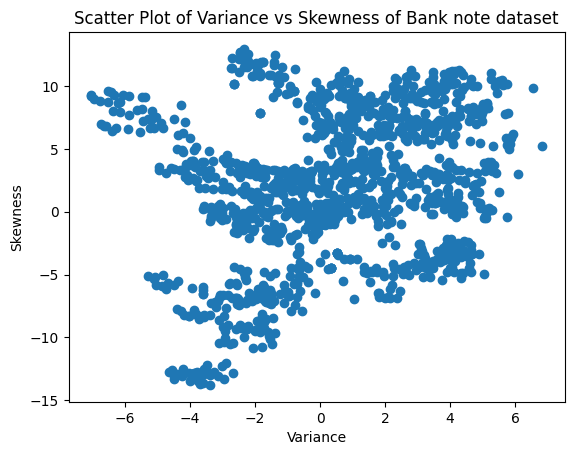

In [65]:

#visualizing raw data
import matplotlib.pyplot as plt
plt.scatter(df.V1, df.V2)
plt.title('Scatter Plot of Variance vs Skewness of Bank note dataset')
plt.xlabel('Variance')
plt.ylabel('Skewness')
#plt.savefig('scatter.png')
plt.show()


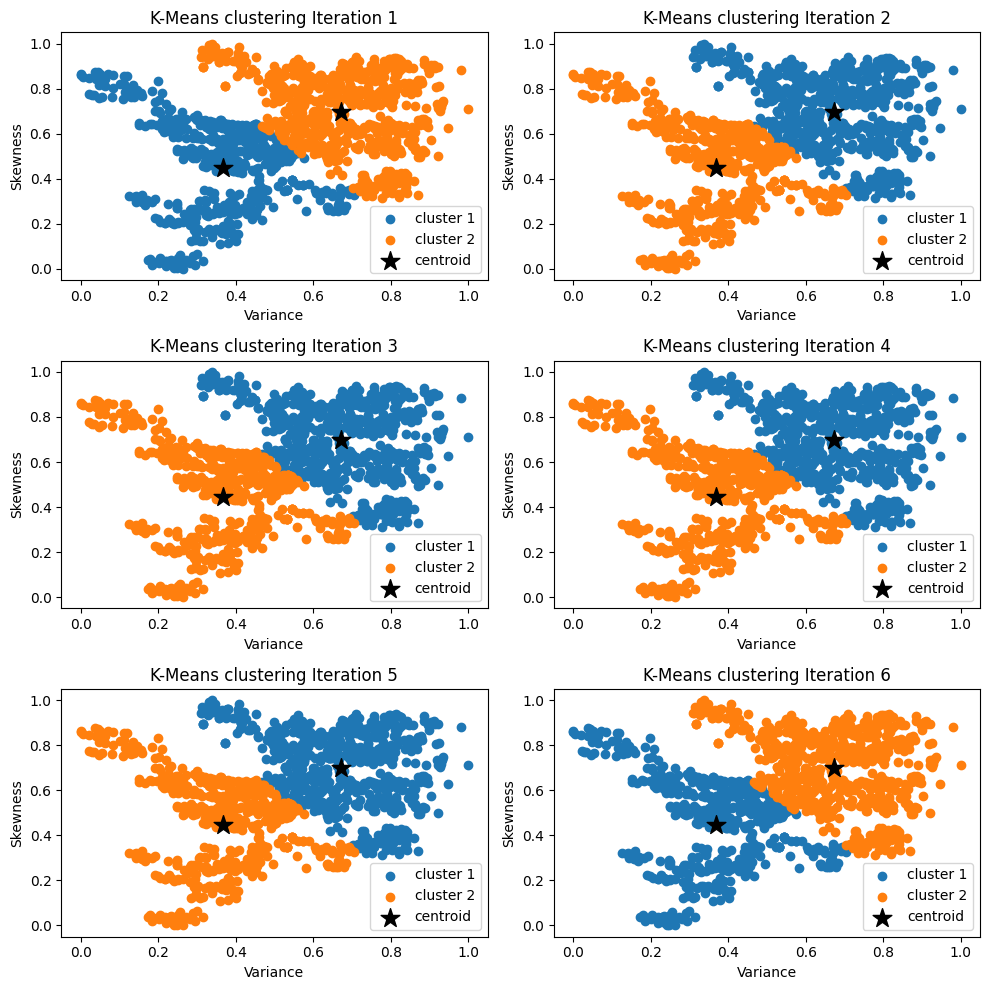

In [40]:

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

V1_mean=df['V1'].mean()
V2_mean=df['V2'].mean()
V1_std=df['V1'].std()
V2_std=df['V2'].std()
V1_max=df['V1'].max()
V2_max=df['V2'].max()
V1_min=df['V1'].min()
V2_min=df['V2'].min()


# domain standardisation: the data points will all lie
# between 0 (smallest one) and 1 (largest one)
V1_scaled=(df['V1']-V1_min)/(V1_max-V1_min)
V2_scaled=(df['V2']-V2_min)/(V2_max-V2_min)

#describtive stats of the scaled Data
mean_V1_scaled=np.mean(V1_scaled)
mean_V2_scaled=np.mean(V2_scaled)
std_V1_scaled=np.std(V1_scaled)
std_V2_scaled=np.std(V2_scaled)

#updating V1 and V2 in the dataframe
df['V1']=V1_scaled
df['V2']=V2_scaled

#k-means clustering run K-means on the given dataset,visualize,re-run K-means several times to test stability and visualise the results
n_iter = 6
fig, ax = plt.subplots(3, 2, figsize=(10,10))
ax = np.ravel(ax)
for i in range(n_iter):
  km = KMeans(n_clusters=2,max_iter=3)
  km.fit(df)
  centroids=km.cluster_centers_
  df['cluster']=km.labels_
  df1 = df[df.cluster==0]
  df2 = df[df.cluster==1]
  ax[i].scatter(df1['V1'], df1['V2'],label='cluster 1')
  ax[i].scatter(df2['V1'], df2['V2'],label='cluster 2')
  ax[i].scatter(centroids[:, 0], centroids[:, 1],c='black', marker='*', s=200, label='centroid')
  ax[i].legend()
  ax[i].set_title(f'K-Means clustering Iteration {i+1}')
  ax[i].set_xlabel('Variance')
  ax[i].set_ylabel('Skewness')
  plt.tight_layout()






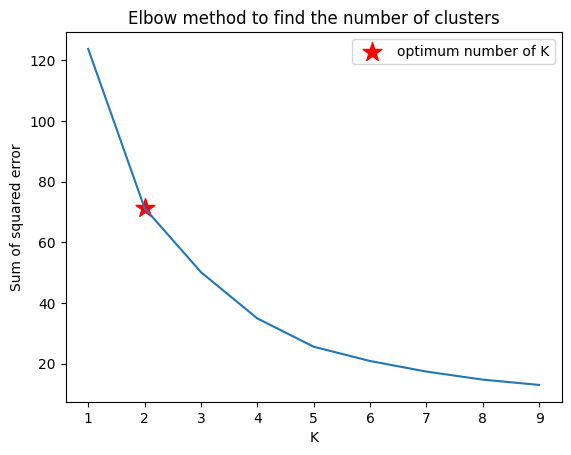

In [53]:
#Applying Elbow method to find the optimum number of clusters
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['V1','V2']])
    sse.append(km.inertia_)
    plt.xlabel('K')
plt.title('Elbow method to find the number of clusters')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.scatter(2,sse[1],c='red', marker='*', s=200,label='optimum number of K')
plt.legend()
#plt.savefig('elbow.png')

**After running K-Means 6 times, the results we got are very similar, which means the K-Means here are stable.**